# Backtesting Stock Trading Strategies (S&P 500)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')


In [2]:
import yfinance as yf
GSPC = yf.download('^GSPC', start = '2000-01-01', end = '2019-12-31')
GSPC

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3060610000
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000


In [3]:
GSPC.to_csv('GSPC.csv')

In [4]:
data = pd.read_csv('GSPC.csv', parse_dates = ['Date'], index_col = 'Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3060610000
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000


In [5]:
data['Close']

Date
2000-01-03    1455.219971
2000-01-04    1399.420044
2000-01-05    1402.109985
2000-01-06    1403.449951
2000-01-07    1441.469971
                 ...     
2019-12-23    3224.010010
2019-12-24    3223.379883
2019-12-26    3239.909912
2019-12-27    3240.020020
2019-12-30    3221.290039
Name: Close, Length: 5030, dtype: float64

In [6]:
df = data.loc['2010-01-01':'2019-12-31', 'Close'].to_frame()
df

,Close
Date,
2010-01-04,1132.989990
2010-01-05,1136.520020
2010-01-06,1137.140015
2010-01-07,1141.689941
2010-01-08,1144.979980
...,...
2019-12-23,3224.010010
2019-12-24,3223.379883
2019-12-26,3239.909912


In [7]:
df.describe()

,Close
count,2515.000000
mean,1962.104611
std,588.483867
min,1022.580017
25%,1383.669983
50%,1986.449951
75%,2433.469971
max,3240.020020


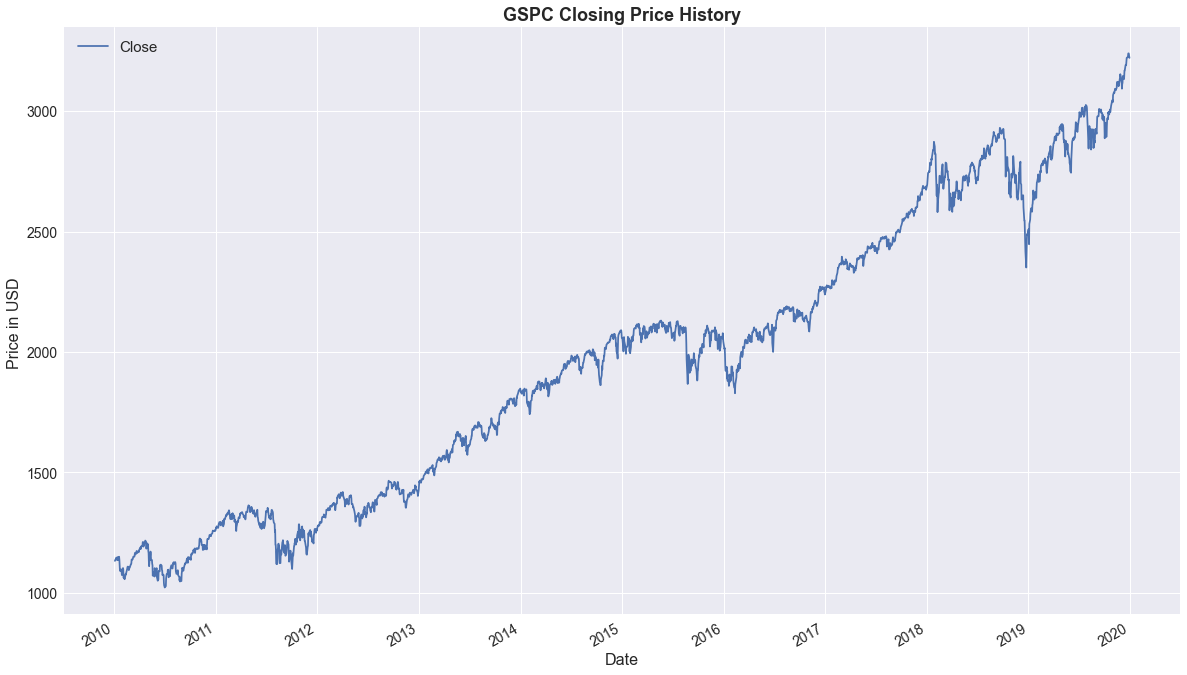

In [8]:
df.plot(figsize = (20,12), fontsize = 14)
plt.title('GSPC Closing Price History', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.xlabel('Date', size = 16)
plt.ylabel('Price in USD ', size = 16)
plt.legend(fontsize = 15)
plt.show()

In [9]:
df['GSPC Return'] = df.pct_change()
df

,Close,GSPC Return
Date,,
2010-01-04,1132.989990,NaN
2010-01-05,1136.520020,0.003116
2010-01-06,1137.140015,0.000546
2010-01-07,1141.689941,0.004001
2010-01-08,1144.979980,0.002882
...,...,...
2019-12-23,3224.010010,0.000866
2019-12-24,3223.379883,-0.000195
2019-12-26,3239.909912,0.005128


In [10]:
df.columns = ['GSPC Close', 'GSPC Return']
df.dropna(inplace = True)
df

,GSPC Close,GSPC Return
Date,,
2010-01-05,1136.520020,0.003116
2010-01-06,1137.140015,0.000546
2010-01-07,1141.689941,0.004001
2010-01-08,1144.979980,0.002882
2010-01-11,1146.979980,0.001747
...,...,...
2019-12-23,3224.010010,0.000866
2019-12-24,3223.379883,-0.000195
2019-12-26,3239.909912,0.005128


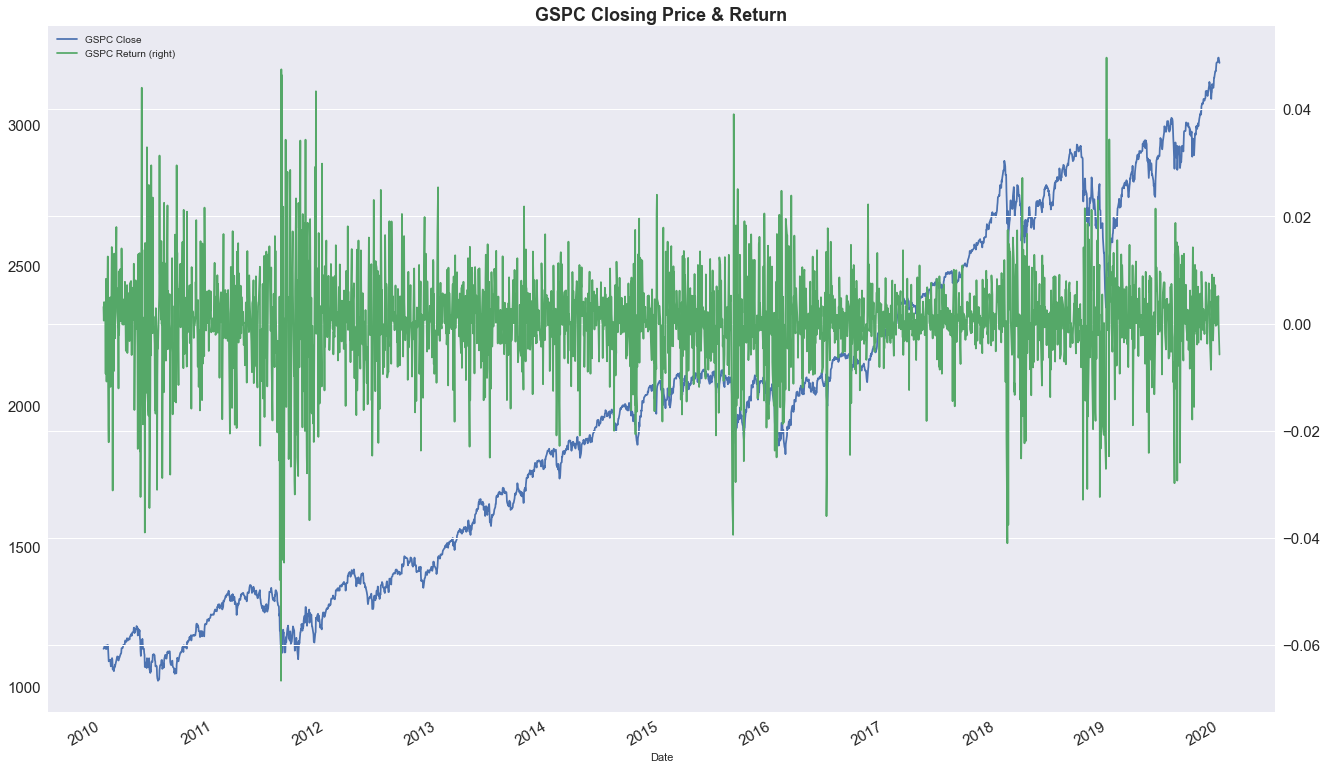

In [11]:
df.plot(figsize = (22,14), secondary_y = 'GSPC Return',  mark_right = True, fontsize = 15)
plt.title('GSPC Closing Price & Return', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.show()

## Backtesting a Simple Momentum Strategy


### Positions: 


+1: __Long__ Position (Investing in GSPC) <br>
-1: __Short__ Position (Short Selling GSPC)<br>
 0: __Neutral__ Position 

### Strategies:
- __Buy and Hold__: Invest into GSPC and do nothing (+1 on any given day)

- __Simple Momentum__: <br>
__a) Investing (+1)__ in GSPC tomorrow if today´s return was __positive__ <br>
__b) Short Selling (-1)__ GSPC tomorrow if today´s return was __negative__

In [12]:
df['Position'] = np.sign(df['GSPC Return']).astype('int64')
df

,GSPC Close,GSPC Return,Position
Date,,,
2010-01-05,1136.520020,0.003116,1
2010-01-06,1137.140015,0.000546,1
2010-01-07,1141.689941,0.004001,1
2010-01-08,1144.979980,0.002882,1
2010-01-11,1146.979980,0.001747,1
...,...,...,...
2019-12-23,3224.010010,0.000866,1
2019-12-24,3223.379883,-0.000195,-1
2019-12-26,3239.909912,0.005128,1


In [13]:
df['Strategy Return'] = df['Position'].shift() * df['GSPC Return']
df

,GSPC Close,GSPC Return,Position,Strategy Return
Date,,,,
2010-01-05,1136.520020,0.003116,1,NaN
2010-01-06,1137.140015,0.000546,1,0.000546
2010-01-07,1141.689941,0.004001,1,0.004001
2010-01-08,1144.979980,0.002882,1,0.002882
2010-01-11,1146.979980,0.001747,1,0.001747
...,...,...,...,...
2019-12-23,3224.010010,0.000866,1,0.000866
2019-12-24,3223.379883,-0.000195,-1,-0.000195
2019-12-26,3239.909912,0.005128,1,-0.005128


In [14]:
df['Strategy'] = df['Strategy Return'].add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,GSPC Close,GSPC Return,Position,Strategy Return,Strategy
Date,,,,,
2010-01-05,1136.520020,0.003116,1,NaN,1136.520020
2010-01-06,1137.140015,0.000546,1,0.000546,1137.140015
2010-01-07,1141.689941,0.004001,1,0.004001,1141.689941
2010-01-08,1144.979980,0.002882,1,0.002882,1144.979980
2010-01-11,1146.979980,0.001747,1,0.001747,1146.979980
...,...,...,...,...,...
2019-12-23,3224.010010,0.000866,1,0.000866,1070.472611
2019-12-24,3223.379883,-0.000195,-1,-0.000195,1070.263389
2019-12-26,3239.909912,0.005128,1,-0.005128,1064.774900


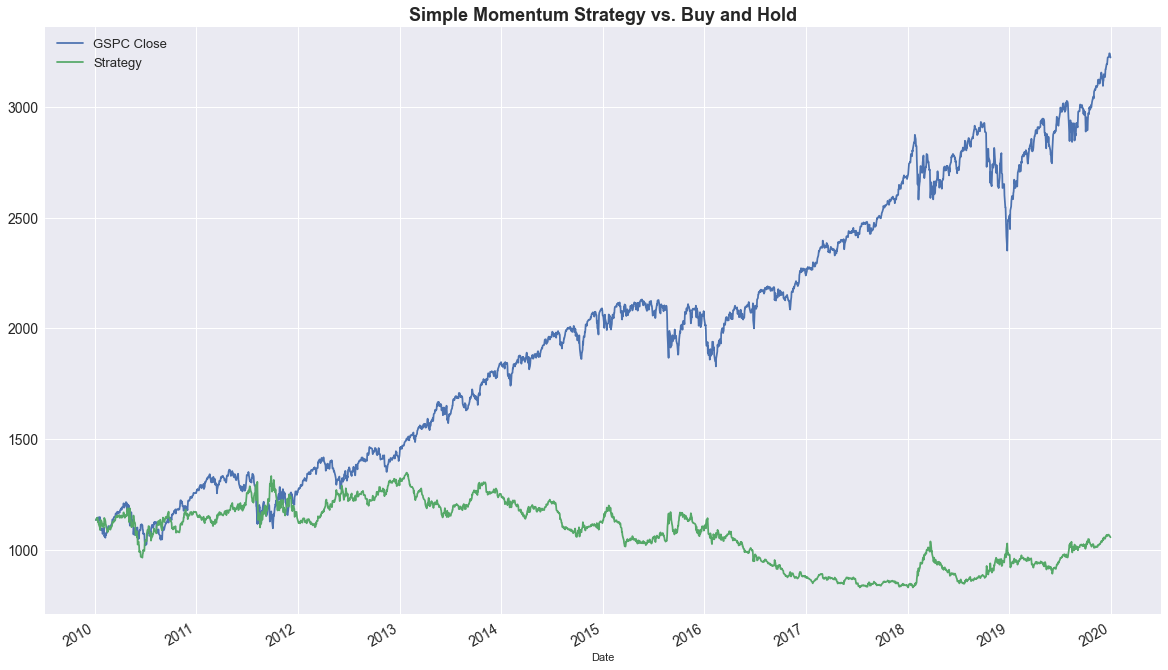

In [15]:
df[['GSPC Close', 'Strategy']].plot(figsize = (20,12), fontsize = 14)
plt.title('Simple Momentum Strategy vs. Buy and Hold', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.legend(fontsize = 13)
plt.show()

#### Annualized Return and Risk

In [16]:
def ann_rr(returns):
    output = returns.agg(['mean', 'std']).T       
    output['Annualized Return'] = output['mean'] * 252
    output['Annualized Risk'] = output['std'] * np.sqrt(252)
    output.drop(columns = ['mean', 'std'], inplace = True)  
    return(output)

ann_rr(df[['GSPC Return', 'Strategy Return']])

,Annualized Return,Annualized Risk
GSPC Return,0.115690,0.147682
Strategy Return,0.003815,0.147885


## Backtesting a Simple Contrarian Strategy

__Strategies__:
- __Buy and Hold__  <br>
- __Simple Contrarian:__ <br>
__a) Investing (+1)__ in GSPC tomorrow if today´s return was __negative__ <br>
__b) Short Selling (-1)__ GSPC tomorrow if today´s return was __positive__ 


In [17]:
GSPC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3060610000
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000


In [18]:
df = data.loc['2010':, 'Close'].to_frame()
df['GSPC Return'] = df['Close'].pct_change()
df.columns = ['GSPC Close', 'GSPC Return']
df.dropna(inplace = True)
df

,GSPC Close,GSPC Return
Date,,
2010-01-05,1136.520020,0.003116
2010-01-06,1137.140015,0.000546
2010-01-07,1141.689941,0.004001
2010-01-08,1144.979980,0.002882
2010-01-11,1146.979980,0.001747
...,...,...
2019-12-23,3224.010010,0.000866
2019-12-24,3223.379883,-0.000195
2019-12-26,3239.909912,0.005128


In [19]:
df['Position'] = -np.sign(df['GSPC Return']).astype('int64')
df['Strategy Return'] = df['Position'].shift() * df['GSPC Return']
df['Strategy'] = df['Strategy Return'].add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,GSPC Close,GSPC Return,Position,Strategy Return,Strategy
Date,,,,,
2010-01-05,1136.520020,0.003116,-1,NaN,1136.520020
2010-01-06,1137.140015,0.000546,-1,-0.000546,1135.900024
2010-01-07,1141.689941,0.004001,-1,-0.004001,1131.355059
2010-01-08,1144.979980,0.002882,-1,-0.002882,1128.094802
2010-01-11,1146.979980,0.001747,-1,-0.001747,1126.124297
...,...,...,...,...,...
2019-12-23,3224.010010,0.000866,-1,-0.000866,970.277759
2019-12-24,3223.379883,-0.000195,1,0.000195,970.467398
2019-12-26,3239.909912,0.005128,-1,0.005128,975.444117


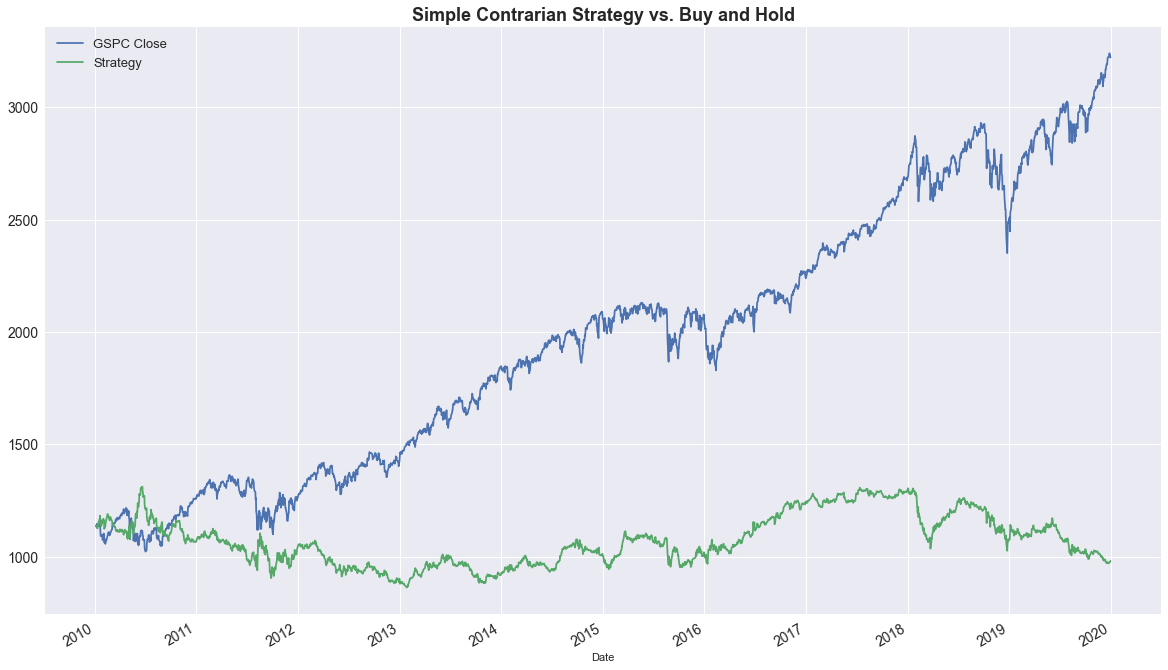

In [20]:
df[['GSPC Close', 'Strategy']].plot(figsize = (20,12), fontsize = 14)
plt.title('Simple Contrarian Strategy vs. Buy and Hold', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.legend(fontsize = 13)
plt.show()

#### Annualized Return and Risk

In [21]:
ann_rr(df[['GSPC Return', 'Strategy Return']])

,Annualized Return,Annualized Risk
GSPC Return,0.115690,0.147682
Strategy Return,-0.003815,0.147885


## Backtesting SMA Crossover Strategy

In [22]:
df = df.iloc[:, :2]
df

,GSPC Close,GSPC Return
Date,,
2010-01-05,1136.520020,0.003116
2010-01-06,1137.140015,0.000546
2010-01-07,1141.689941,0.004001
2010-01-08,1144.979980,0.002882
2010-01-11,1146.979980,0.001747
...,...,...
2019-12-23,3224.010010,0.000866
2019-12-24,3223.379883,-0.000195
2019-12-26,3239.909912,0.005128


In [23]:
df['SMA50'] = df['GSPC Close'].rolling(window = 50).mean()
df

,GSPC Close,GSPC Return,SMA50
Date,,,
2010-01-05,1136.520020,0.003116,NaN
2010-01-06,1137.140015,0.000546,NaN
2010-01-07,1141.689941,0.004001,NaN
2010-01-08,1144.979980,0.002882,NaN
2010-01-11,1146.979980,0.001747,NaN
...,...,...,...
2019-12-23,3224.010010,0.000866,3095.816587
2019-12-24,3223.379883,-0.000195,3100.961187
2019-12-26,3239.909912,0.005128,3105.845786


In [24]:
df['SMA200'] = df['GSPC Close'].rolling(window = 200).mean()
df

,GSPC Close,GSPC Return,SMA50,SMA200
Date,,,,
2010-01-05,1136.520020,0.003116,NaN,NaN
2010-01-06,1137.140015,0.000546,NaN,NaN
2010-01-07,1141.689941,0.004001,NaN,NaN
2010-01-08,1144.979980,0.002882,NaN,NaN
2010-01-11,1146.979980,0.001747,NaN,NaN
...,...,...,...,...
2019-12-23,3224.010010,0.000866,3095.816587,2957.399591
2019-12-24,3223.379883,-0.000195,3100.961187,2959.558890
2019-12-26,3239.909912,0.005128,3105.845786,2961.703840


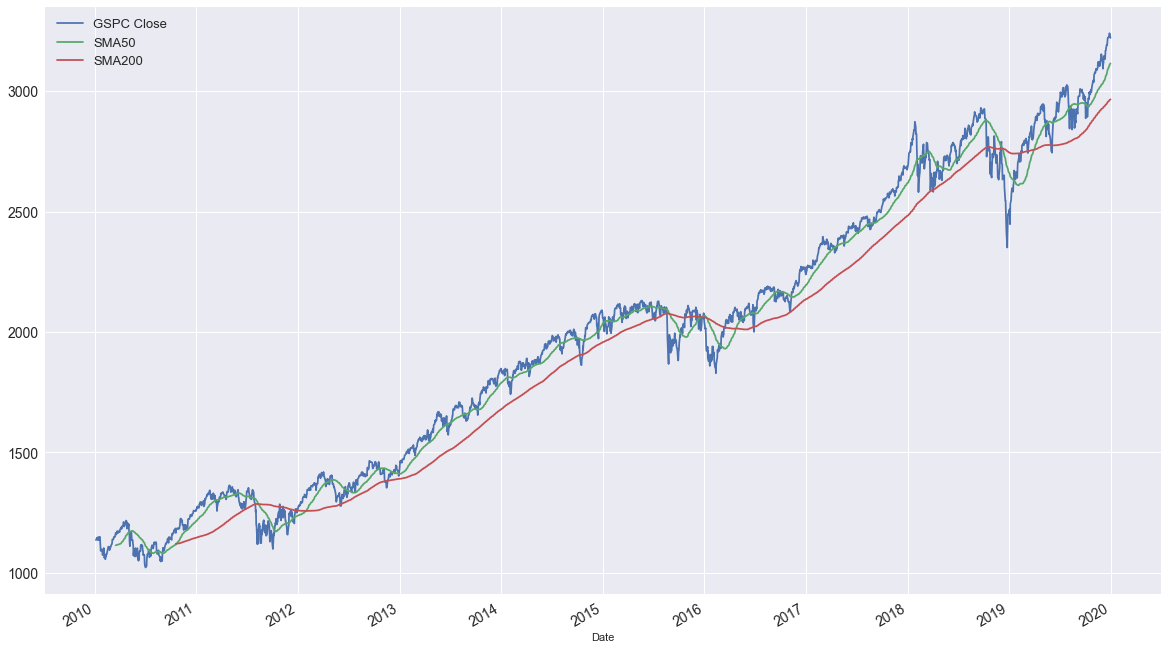

In [25]:
df[['GSPC Close', 'SMA50', 'SMA200']].plot(figsize = (20,12), fontsize = 14)
plt.legend(fontsize = 13)
plt.show()

In [26]:
df.dropna(inplace = True)
df

,GSPC Close,GSPC Return,SMA50,SMA200
Date,,,,
2010-10-19,1165.900024,-0.015877,1117.522598,1120.929197
2010-10-20,1178.170044,0.010524,1118.664797,1121.137447
2010-10-21,1180.260010,0.001774,1120.480598,1121.353047
2010-10-22,1183.079956,0.002389,1122.469998,1121.559997
2010-10-25,1185.619995,0.002147,1124.597397,1121.763197
...,...,...,...,...
2019-12-23,3224.010010,0.000866,3095.816587,2957.399591
2019-12-24,3223.379883,-0.000195,3100.961187,2959.558890
2019-12-26,3239.909912,0.005128,3105.845786,2961.703840


__Strategies:__ <br>
- __Buy and Hold__  <br>
- __SMA Crossover:__  <br>
__a) Investing (+1)__ in GSPC tomorrow if __SMA50 > SMA200__ today<br>
__b) Short Selling (-1)__ GSPC tomorrow if __SMA50 < SMA200__ today

In [27]:
df['Position'] = np.sign(df['SMA50'].sub(df['SMA200'])).astype('int64')   
df

,GSPC Close,GSPC Return,SMA50,SMA200,Position
Date,,,,,
2010-10-19,1165.900024,-0.015877,1117.522598,1120.929197,-1
2010-10-20,1178.170044,0.010524,1118.664797,1121.137447,-1
2010-10-21,1180.260010,0.001774,1120.480598,1121.353047,-1
2010-10-22,1183.079956,0.002389,1122.469998,1121.559997,1
2010-10-25,1185.619995,0.002147,1124.597397,1121.763197,1
...,...,...,...,...,...
2019-12-23,3224.010010,0.000866,3095.816587,2957.399591,1
2019-12-24,3223.379883,-0.000195,3100.961187,2959.558890,1
2019-12-26,3239.909912,0.005128,3105.845786,2961.703840,1


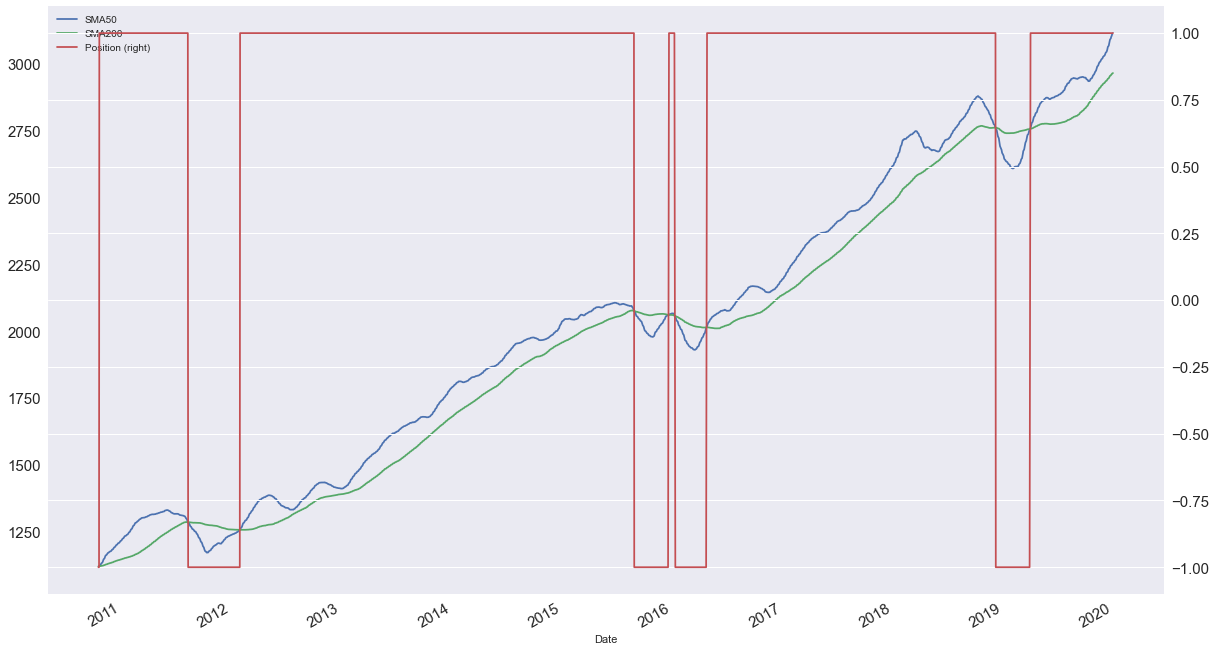

In [28]:
df[['SMA50', 'SMA200', 'Position']].plot(secondary_y = 'Position', figsize = (20,12), fontsize = 15)
plt.show()

In [29]:
df['Strategy Return'] = df['Position'].shift() * df['GSPC Return']
df['Strategy'] = df['Strategy Return'].add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,GSPC Close,GSPC Return,SMA50,SMA200,Position,Strategy Return,Strategy
Date,,,,,,,
2010-10-19,1165.900024,-0.015877,1117.522598,1120.929197,-1,NaN,1165.900024
2010-10-20,1178.170044,0.010524,1118.664797,1121.137447,-1,-0.010524,1153.630005
2010-10-21,1180.260010,0.001774,1120.480598,1121.353047,-1,-0.001774,1151.583571
2010-10-22,1183.079956,0.002389,1122.469998,1121.559997,1,-0.002389,1148.832140
2010-10-25,1185.619995,0.002147,1124.597397,1121.763197,1,0.002147,1151.298650
...,...,...,...,...,...,...,...
2019-12-23,3224.010010,0.000866,3095.816587,2957.399591,1,0.000866,1652.868886
2019-12-24,3223.379883,-0.000195,3100.961187,2959.558890,1,-0.000195,1652.545836
2019-12-26,3239.909912,0.005128,3105.845786,2961.703840,1,0.005128,1661.020366


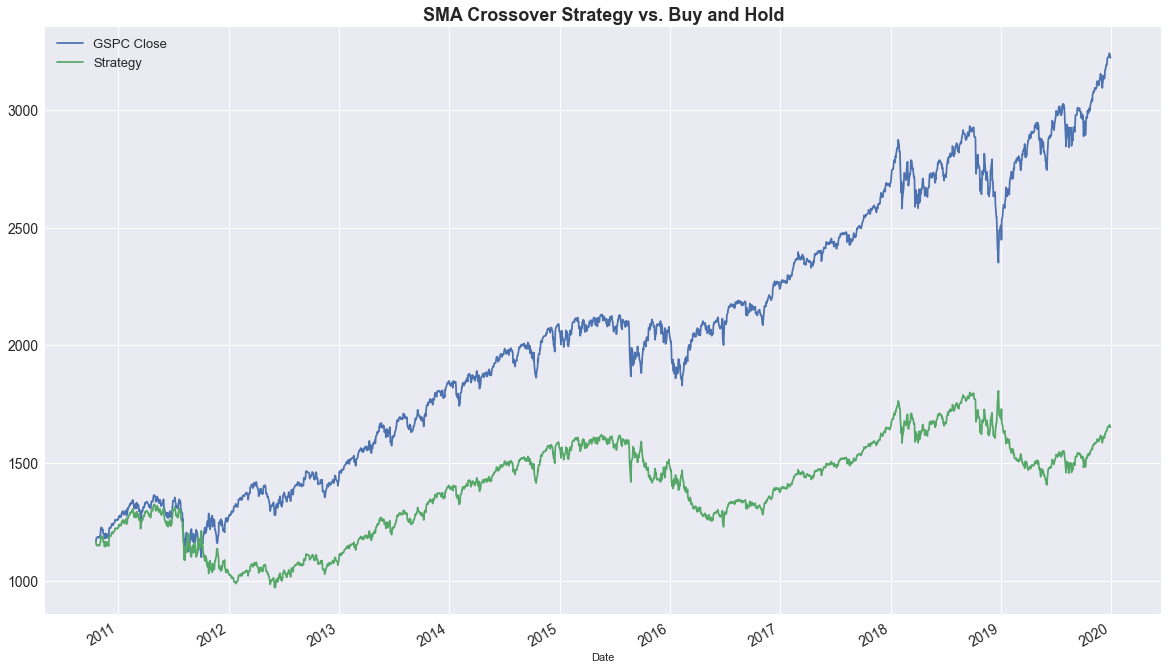

In [30]:
df[['GSPC Close', 'Strategy']].plot(figsize = (20,12), fontsize = 14)
plt.title('SMA Crossover Strategy vs. Buy and Hold', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.legend(fontsize = 13)
plt.show()

#### Annualized Risk and Return

In [31]:
ann_rr(df[['GSPC Return', 'Strategy Return']])

,Annualized Return,Annualized Risk
GSPC Return,0.119179,0.143157
Strategy Return,0.048211,0.143257


## Backtesting the Corresponding Contrarian Strategy

__Strategies:__ <br>
- __Buy and Hold__  <br>
- __SMA Crossover:__  <br>
__a) Investing (+1)__ in GSPC tomorrow if __SMA50 < SMA200__ today<br>
__b) Short Selling (-1)__ GSPC tomorrow if __SMA50 > SMA200__ today

In [32]:
df['Position'] = np.sign(df['SMA200'].sub(df['SMA50'])).astype('int64')   
df

,GSPC Close,GSPC Return,SMA50,SMA200,Position,Strategy Return,Strategy
Date,,,,,,,
2010-10-19,1165.900024,-0.015877,1117.522598,1120.929197,1,NaN,1165.900024
2010-10-20,1178.170044,0.010524,1118.664797,1121.137447,1,-0.010524,1153.630005
2010-10-21,1180.260010,0.001774,1120.480598,1121.353047,1,-0.001774,1151.583571
2010-10-22,1183.079956,0.002389,1122.469998,1121.559997,-1,-0.002389,1148.832140
2010-10-25,1185.619995,0.002147,1124.597397,1121.763197,-1,0.002147,1151.298650
...,...,...,...,...,...,...,...
2019-12-23,3224.010010,0.000866,3095.816587,2957.399591,-1,0.000866,1652.868886
2019-12-24,3223.379883,-0.000195,3100.961187,2959.558890,-1,-0.000195,1652.545836
2019-12-26,3239.909912,0.005128,3105.845786,2961.703840,-1,0.005128,1661.020366


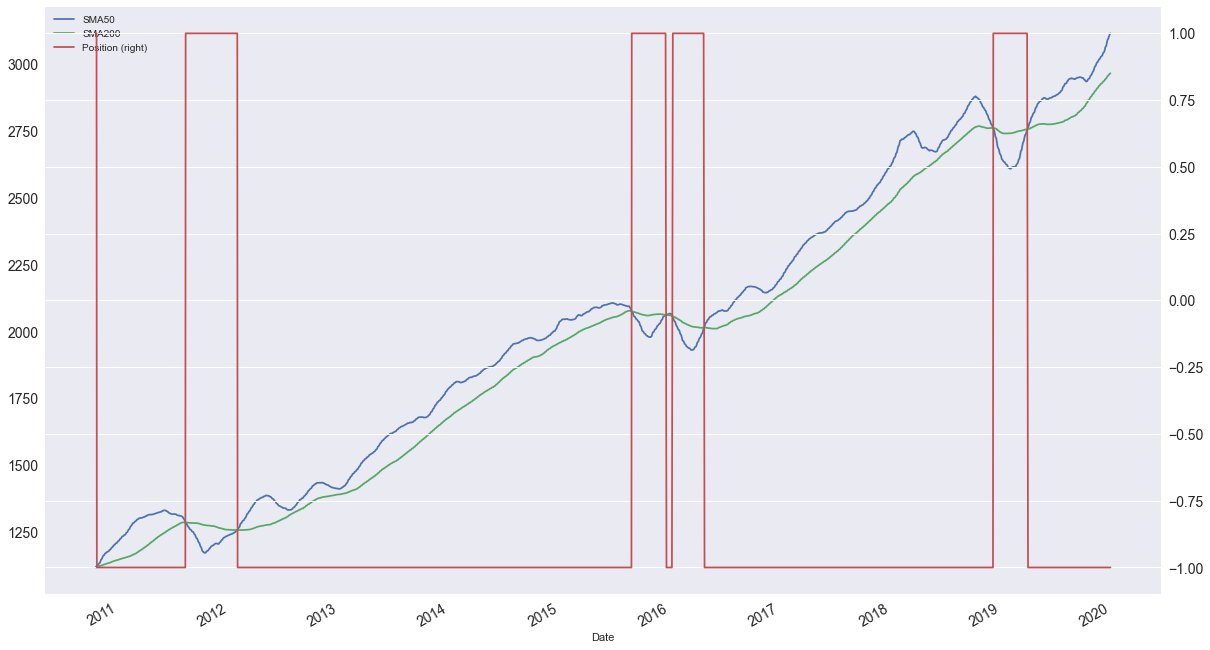

In [33]:
df[['SMA50', 'SMA200', 'Position']].plot(secondary_y = 'Position', figsize = (20,12), fontsize = 14)
plt.show()

In [34]:
df['Strategy Return'] = df['Position'].shift() * df['GSPC Return']
df['Strategy'] = df['Strategy Return'].add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,GSPC Close,GSPC Return,SMA50,SMA200,Position,Strategy Return,Strategy
Date,,,,,,,
2010-10-19,1165.900024,-0.015877,1117.522598,1120.929197,1,NaN,1165.900024
2010-10-20,1178.170044,0.010524,1118.664797,1121.137447,1,0.010524,1178.170044
2010-10-21,1180.260010,0.001774,1120.480598,1121.353047,1,0.001774,1180.260010
2010-10-22,1183.079956,0.002389,1122.469998,1121.559997,-1,0.002389,1183.079956
2010-10-25,1185.619995,0.002147,1124.597397,1121.763197,-1,-0.002147,1180.539917
...,...,...,...,...,...,...,...
2019-12-23,3224.010010,0.000866,3095.816587,2957.399591,-1,-0.000866,681.146893
2019-12-24,3223.379883,-0.000195,3100.961187,2959.558890,-1,0.000195,681.280022
2019-12-26,3239.909912,0.005128,3105.845786,2961.703840,-1,-0.005128,677.786304


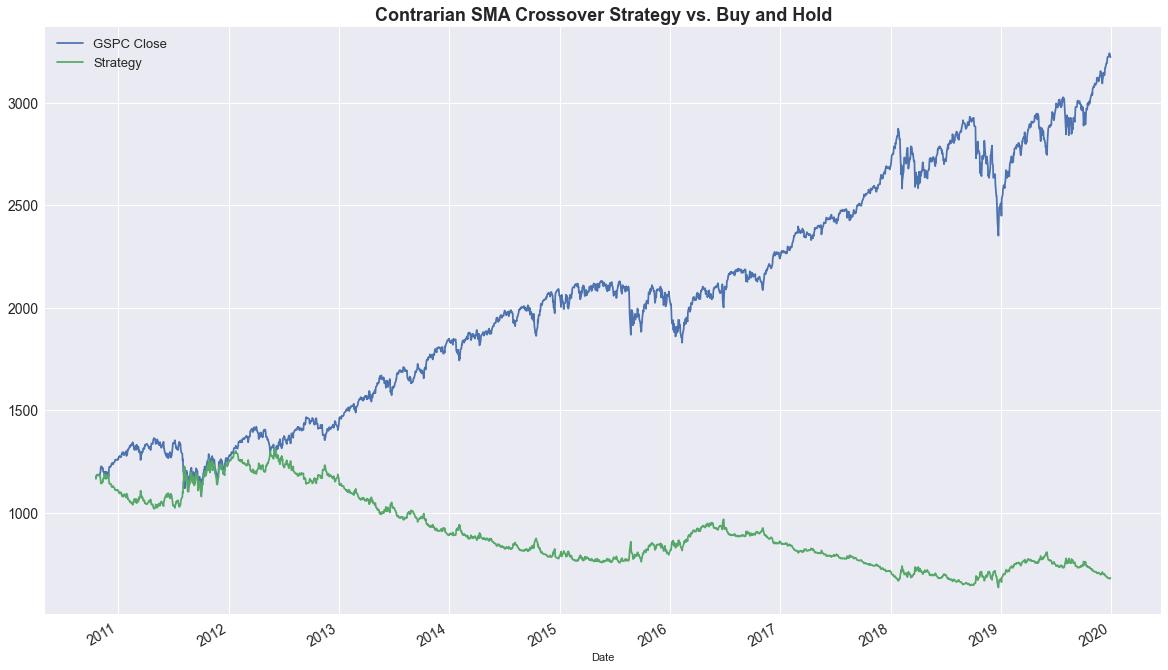

In [35]:
df[['GSPC Close', 'Strategy']].plot(figsize=(20,12), fontsize = 14)
plt.title('Contrarian SMA Crossover Strategy vs. Buy and Hold', fontdict={'fontweight':'bold', 'fontsize':18})  
plt.legend(fontsize = 13)
plt.show()

### Annualized Risk and Return

In [36]:
ann_rr(df[['GSPC Return', 'Strategy Return']])

,Annualized Return,Annualized Risk
GSPC Return,0.119179,0.143157
Strategy Return,-0.048211,0.143257


## Another Simple Contrarian Strategy

In [37]:
df = data.loc['2010':, 'Close'].to_frame()
df['GSPC Return'] = df['Close'].pct_change()
df.columns = ['GSPC Close', 'GSPC Return']
df.dropna(inplace = True)
df

,GSPC Close,GSPC Return
Date,,
2010-01-05,1136.520020,0.003116
2010-01-06,1137.140015,0.000546
2010-01-07,1141.689941,0.004001
2010-01-08,1144.979980,0.002882
2010-01-11,1146.979980,0.001747
...,...,...
2019-12-23,3224.010010,0.000866
2019-12-24,3223.379883,-0.000195
2019-12-26,3239.909912,0.005128


__Strategies:__
- __Buy and Hold__  <br>
- __Simple Contrarian:__ <br>
(a) __Short Selling (-1)__ GSPC tomorrow if today´s return was __greater than 0.0095__ <br>
(b) __Investing (+1)__ in GSPC tomorrow if today´s return was __less than or equal to 0.0095__ 

In [38]:
df['Position'] = np.where(df['GSPC Return'] > 0.0095, -1, 1)  
df['Strategy Return'] = df['Position'].shift() * df['GSPC Return']
df['Strategy'] = df['Strategy Return'].add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,GSPC Close,GSPC Return,Position,Strategy Return,Strategy
Date,,,,,
2010-01-05,1136.520020,0.003116,1,NaN,1136.520020
2010-01-06,1137.140015,0.000546,1,0.000546,1137.140015
2010-01-07,1141.689941,0.004001,1,0.004001,1141.689941
2010-01-08,1144.979980,0.002882,1,0.002882,1144.979980
2010-01-11,1146.979980,0.001747,1,0.001747,1146.979980
...,...,...,...,...,...
2019-12-23,3224.010010,0.000866,1,0.000866,4727.571183
2019-12-24,3223.379883,-0.000195,1,-0.000195,4726.647188
2019-12-26,3239.909912,0.005128,1,0.005128,4750.886223


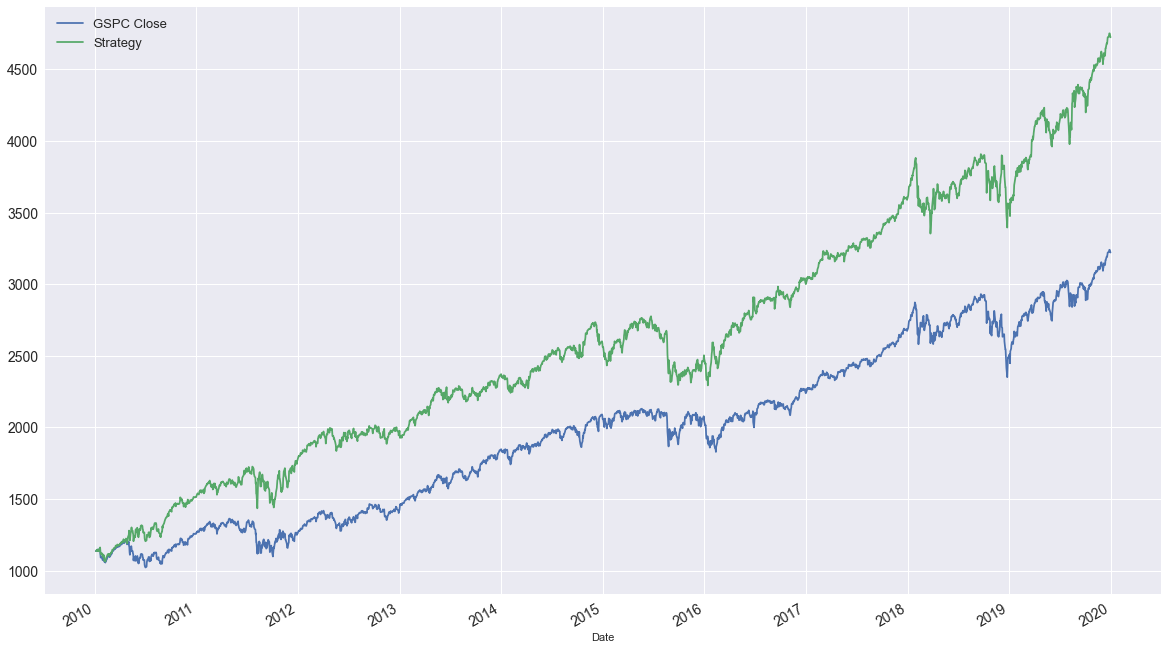

In [39]:
df[['GSPC Close', 'Strategy']].plot(figsize = (20,12), fontsize = 14)    
plt.legend(fontsize = 13)
plt.show()

#### Annualized Risk and Return

In [40]:
ann_rr(df[['GSPC Return', 'Strategy Return']])

,Annualized Return,Annualized Risk
GSPC Return,0.115690,0.147682
Strategy Return,0.153794,0.147570
